In [1]:
# Various methods for plotting in Julia
# Packages used: "Plots", "Gadfly"
# http://docs.juliaplots.org/latest/

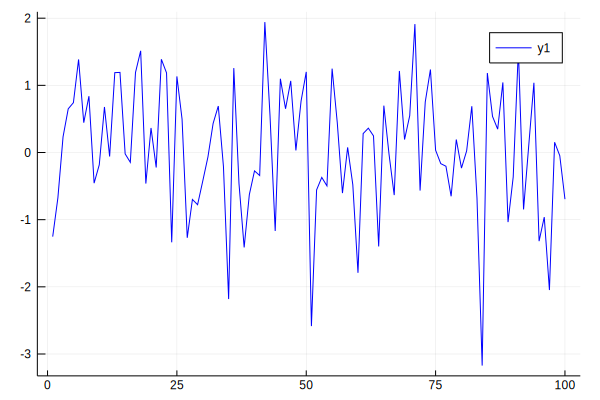

In [2]:
using Plots
ts_length = 100
ϵ_values = randn(ts_length)
Plots.plot(ϵ_values, color="blue")

In [2]:
### Using sample data for Luxembourg
# A4102 Approvisionnement mensuel en électricité (en kWh) 2008 - 2018
# Titre : Approvisionnement mensuel en électricité (en kWh) 2008 - 2018
# Source : STATEC
# Catégorie : Territoire et environnement - Energie
# Mots-clés : énergie
using CSV
data = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/a4102.csv", datarow = 2, delim = ',')

,Specification,Importations (sans pompage),Exportations,Production hydroelectrique (sans pompage),Production eolienne,Production thermique,Production par cogeneration classique,Production par biomethanisation
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,Janvier 2008,515403907,268905073,15882142,8901314,239481115,39839031,3477378
2,Fevrier 2008,492908231,242287220,13229723,5632166,216082894,37509067,3105901
3,Mars 2008,511478062,258561148,17904608,8243949,234582495,37060627,3596567
4,Avril 2008,505912438,185736808,15224301,3152205,151696293,34251384,3639754
5,Mai 2008,539487831,76449762,6369060,2906031,2629120,24356917,3244814
6,Juin 2008,515001599,70568448,7452604,2685345,2900040,22806003,3401130
7,Juillet 2008,533531770,102476212,3751408,3495689,39779381,22123174,3418832
8,Aout 2008,424940320,261607531,3507759,5698748,237770055,20837868,3393362
9,Septembre 2008,441011960,247681401,5638506,4922609,237958665,26713702,3122010


In [11]:
# Working with dates: https://en.wikibooks.org/wiki/Introducing_Julia/Working_with_dates_and_times
using Dates
dr = Dates.Date(2008,1):Dates.Month(1):Dates.Date(2019,12)
size(dr)

(144,)

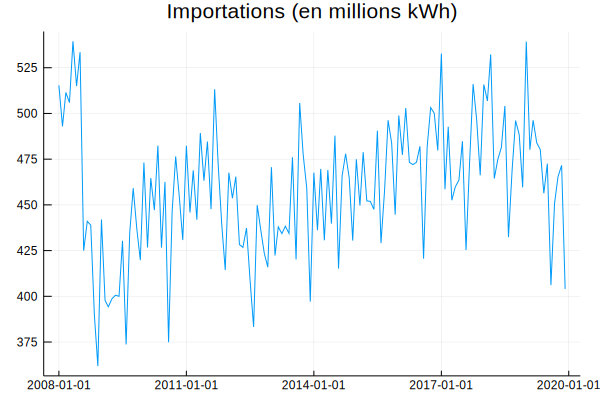

In [25]:
using Plots
Plots.plot( dr, data[2]./1000000, title="Importations (en millions kWh)", label = "" )

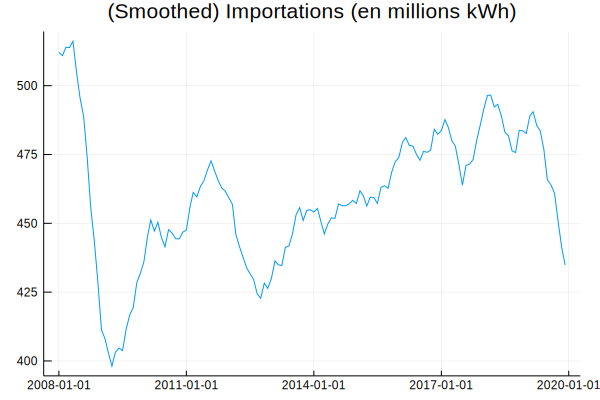

In [23]:
using ImageFiltering, OffsetArrays

kernel = OffsetArray(fill(1/8, 8), -5:2)  # moving average of 5 previous, current, and 2 ahead

iT = 144 # adapt to length of series
#v = zeros(20); v[10] = 1
v = data[1:iT,2]./1000000
[v imfilter(v, kernel)]

Plots.plot( dr, imfilter(v, kernel), title="(Smoothed) Importations (en millions kWh)", label = "" )

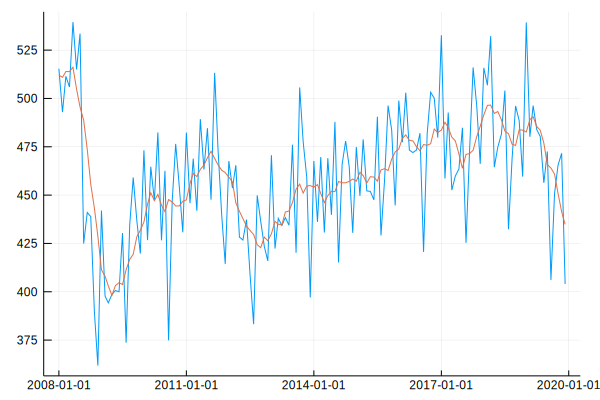

In [27]:
Plots.plot(dr, [data[2]./1000000 imfilter(v, kernel)], label="")

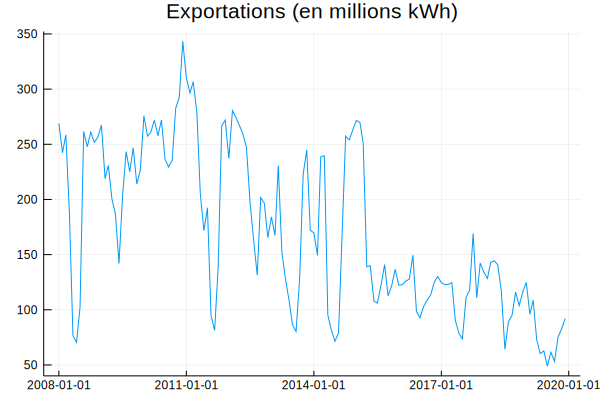

In [19]:
p2 = Plots.plot( dr, data[3]./1000000, title="Exportations (en millions kWh)", label = "" )

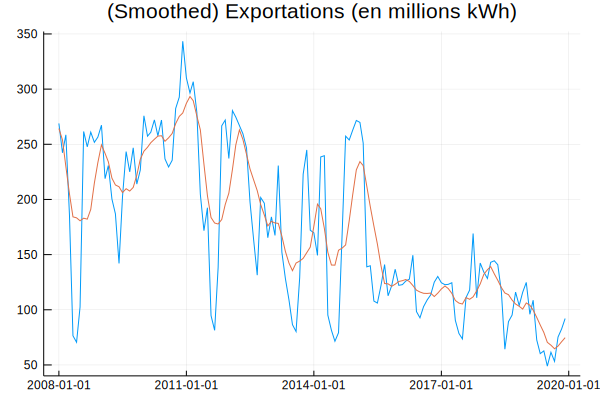

In [29]:
using ImageFiltering, OffsetArrays

kernel = OffsetArray(fill(1/8, 8), -5:2)  # moving average of 5 previous, current, and 2 ahead

iT = 144 # adapt to length of series
#v = zeros(20); v[10] = 1
v_export = data[1:iT,3]./1000000
[v_export imfilter(v_export, kernel)]

Plots.plot( dr, [v_export imfilter(v_export, kernel)], title="(Smoothed) Exportations (en millions kWh)", label = "" )

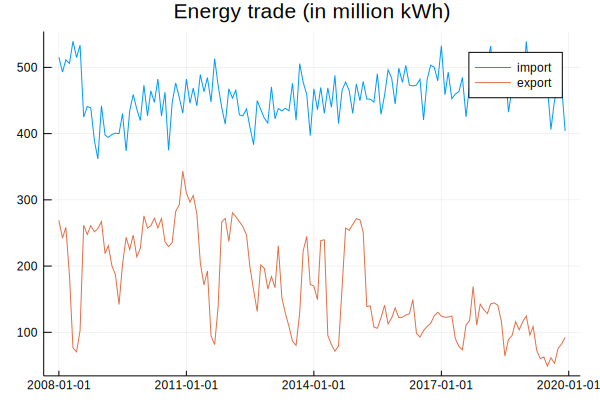

In [16]:
p12 = Plots.plot( dr, [ data[2] data[3] ]./1000000, title="Energy trade (in million kWh)", label=["import" "export"] )

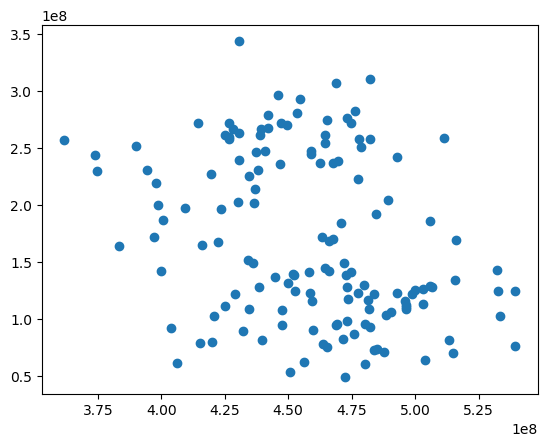

PyObject <matplotlib.collections.PathCollection object at 0x1387e4f98>

In [17]:
using PyPlot
nrows, ncols = size(data)
PyPlot.scatter(data[2:nrows,2], data[2:nrows,3])

In [1]:
p3 = Plots.plot( dr, data[5], title="Production eolienne", label = "eol" )

UndefVarError: UndefVarError: data not defined

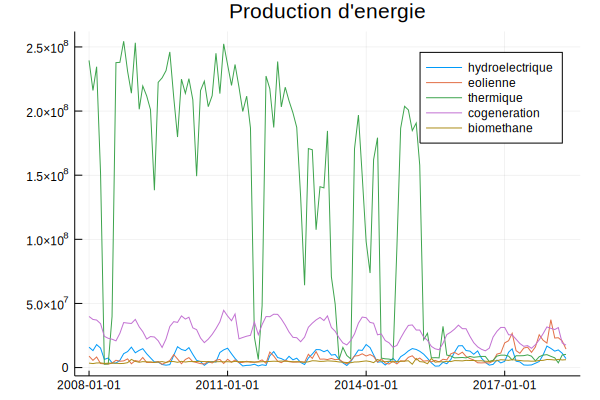

In [61]:
# Approvisionnement mensuel en électricité (en kWh) 2008 - 2018
p4 = plot( dr, [ data[4] data[5] data[6] data[7] data[8] ], title="Production d'energie", label=["hydroelectrique" "eolienne" "thermique" "cogeneration" "biomethane"] )

In [30]:
using CSV
data_pressure = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/a2105.csv", datarow = 2, delim = ',')

,Année,Mois,Pression
,Int64⍰,String⍰,Float64⍰
1,1961,Janvier,731.5
2,missing,Février,736.7
3,missing,Mars,739.2
4,missing,Avril,729.1
5,missing,Mai,732.5
6,missing,Juin,733.7
7,missing,Juillet,733.3
8,missing,Août,734.8
9,missing,Septembre,733.9


In [31]:
using Dates
dr_pressure = Dates.Date(1961,1):Dates.Month(1):Dates.Date(2019,12)

1961-01-01:1 month:2019-12-01

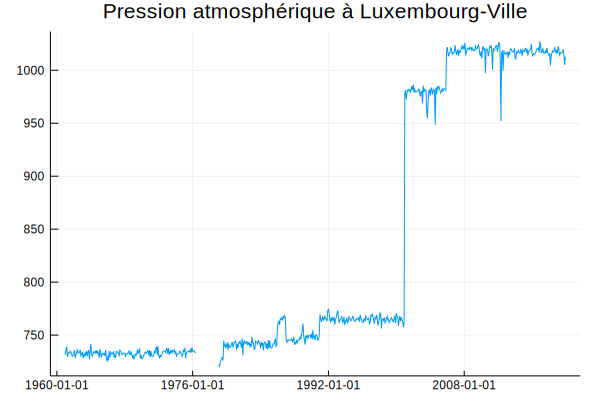

In [35]:
# Avant 2006, Unité: mm. À partir de 2006, Unité: millibar.
#
# La moyenne séculaire de la pression atmosphérique observée à Luxembourg-Ville réduite à 0 degré centigrade, est de 733.5 mm. En considérant que les lectures ont été faites à la température moyenne, la valeur précitée, ramenée au niveau de la mer, s'élève à 733.5 + 29.0 = 762.5 mm ou 1 016.6 millibar.
#
# Selon les moyennes disponibles la moyenne journalière est calculée:
# ­ par un appareil enregistreur
# ­ en divisant par 24 la somme des observations faites heure par heure
# ­ en divisant par 3 la somme des observations faites à 07.00, 13.00 et 21.00 heures.
# La moyenne du mois est obtenue par addition des moyennes de tous les jours et division par le nombre de jours du mois etc. (voir LAHR, Bulletin du STATEC 1966, No 7).
#
p5 = Plots.plot( dr_pressure, data_pressure[3] , title="Pression atmosphérique à Luxembourg-Ville", label=[""] )

In [31]:
using Gadfly, RDatasets
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


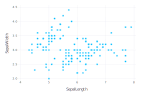

In [36]:
p = Gadfly.plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point)

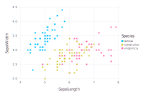

In [40]:
Gadfly.plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species, Geom.point)

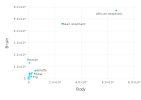

In [43]:
mammals = dataset("MASS", "mammals")
Gadfly.plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label)

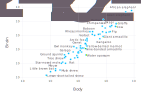

In [45]:
Gadfly.plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label,
     Scale.x_log10, Scale.y_log10)

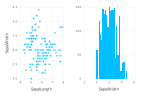

In [46]:
fig1a = Gadfly.plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point)
fig1b = Gadfly.plot(iris, x=:SepalWidth, Geom.bar)
fig1 = Gadfly.hstack(fig1a, fig1b)

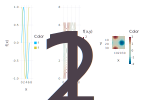

In [47]:
p1 = Gadfly.plot([sin,cos], 0, 2pi)
p2 = Gadfly.plot((x,y)->sin(x)+cos(y), 0, 2pi, 0, 2pi)
p3 = Gadfly.spy(ones(33)*sin.(0:(pi/16):2pi)' + cos.(0:(pi/16):2pi)*ones(33)')
Gadfly.hstack(p1,p2,p3)

In [75]:
# C4301 Interventions des ambulances de la Protection Civile 1962 - 2016
# Administration des services de secours
using CSV
data_accidents = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/c4301.csv", datarow = 2, delim = ',')

,Sp+AOk-cification,Interventions,+AKAAoACg-Accidents de la circulation,+AKAAoACg-Autres accidents,+AKAAoACg-Transports de malades,+AKAAoACg-Autres interventions,+ACI-+AKAAoACg-Exercices,entretien et divers+ACI-,Kilom+AOg-tres parcourus
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Missing
1,1962,303,24,48,89,89,53,10981,missing
2,1965,1512,103,210,777,266,156,49981,missing
3,1970,4018,342,695,2312,421,248,111796,missing
4,1980,13318,1105,2056,8868,811,478,517163,missing
5,1985,19470,1119,2369,14553,917,512,683074,missing
6,1986,20693,1181,2502,15568,922,520,735771,missing
7,1987,20960,1005,2715,15576,1143,521,757818,missing
8,1988,21110,1157,2717,15615,1111,510,759263,missing
9,1989,22881,1186,2754,17080,1287,574,864214,missing


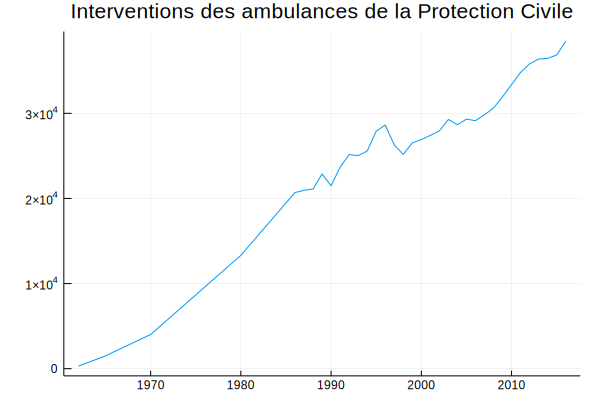

In [72]:
Plots.plot(data_accidents[1], data_accidents[2], title = "Interventions des ambulances de la Protection Civile", label = "")

In [76]:
# C6300 Élèves dans l'enseignement postprimaire 1991/1992 - 2016/2017
# MENJE - Service des Statistiques et Analyses
using CSV
data_education = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/c6300.csv", datarow = 2, delim = ',')

,Specification,Enseignement postprimaire au total,Enseignement public,+AKAAoACg-Masculin,+AKAAoACg-F+AOk-minin,Enseignement priv+AOk-,+AKAAoACg-Masculin_1,+AKAAoACg-F+AOk-minin_1
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1991/1992,20817,18682,10039,8643,2135,493,1642
2,1992/1993,21989,19472,10422,9050,2517,554,1963
3,1993/1994,23138,20635,11030,9605,2503,572,1931
4,1994/1995,25607,22822,12441,10381,2785,591,2194
5,1995/1996,27482,24500,13184,11316,2982,623,2359
6,1996/1997,28483,25386,13626,11760,3097,615,2482
7,1997/1998,29592,26429,14129,12300,3163,675,2488
8,1998/1999,30234,26796,14338,12458,3438,790,2648
9,1999/2000,30603,27070,14427,12643,3533,829,2704


In [84]:
# Sandbox
#typeof(data_education)
names(data_education)
#data_educ = colnames(data_education,["AnneeScolaire","PostPrimTot","EnsPublTot","EnsPublMasc","EnsPublFem","EnsPrivTot","EnsPrivMasc","EnsPrivFem"] )

UndefVarError: UndefVarError: colnames not defined

In [81]:
describe(data_education)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,Specification,,1991/1992,,2016/2017,26,0,String
2,Enseignement postprimaire au total,32875.7,20817,32775.5,39983,,0,Int64
3,Enseignement public,29450.2,18682,29088.0,36312,,0,Int64
4,+AKAAoACg-Masculin,15802.2,10039,15473.5,19516,,0,Int64
5,+AKAAoACg-F+AOk-minin,13648.0,8643,13614.5,16842,,0,Int64
6,Enseignement priv+AOk-,3425.58,2135,3667.0,3791,,0,Int64
7,+AKAAoACg-Masculin_1,678.038,493,646.5,829,,0,Int64
8,+AKAAoACg-F+AOk-minin_1,2747.54,1642,2885.0,3184,,0,Int64


In [90]:
using Dates
dr_education = Dates.Date(1991):Dates.Year(1):Dates.Date(2016)

1991-01-01:1 year:2016-01-01

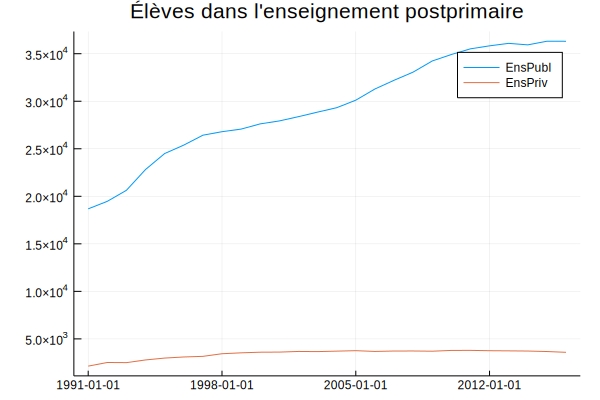

In [91]:
Plots.plot(dr_education, [data_education[3] data_education[6]], title = "Élèves dans l'enseignement postprimaire", label = ["EnsPubl" "EnsPriv"])

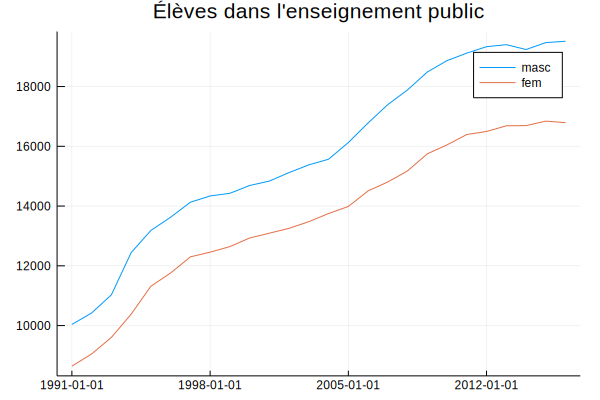

In [92]:
Plots.plot(dr_education, [data_education[4] data_education[5]], title = "Élèves dans l'enseignement public", label = ["masc" "fem"])

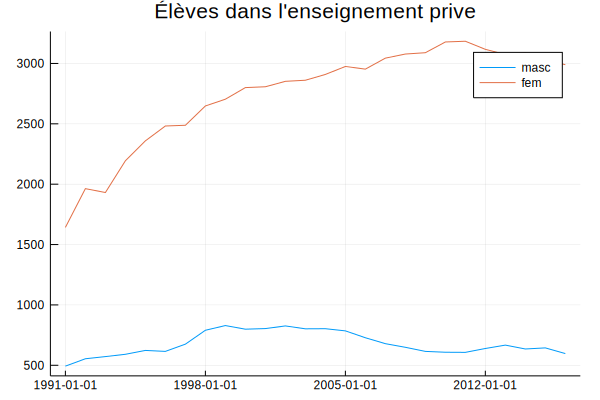

In [93]:
Plots.plot(dr_education, [data_education[7] data_education[8]], title = "Élèves dans l'enseignement prive", label = ["masc" "fem"])

In [106]:
# X046 Écoles et classes de l'enseignement fondamental par commune 2010/2011 - 2016/2017
# MENJE - Service des Statistiques et Analyses
# Année scolaire	2016/2017
using CSV
data_school = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/x046.csv", datarow = 1, delim = ',')

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,Aerenzdall,31,2,53,4,212,14,296,20
2,Beaufort,31,2,61,4,244,18,336,24
3,Beckerich,19,1,51,4,140,12,210,17
4,Berdorf,13,1,46,3,124,7,183,11
5,Bertrange,60,4,123,8,359,24,542,36
6,Bettembourg,96,6,204,13,665,43,965,62
7,Bettendorf,21,2,56,4,177,12,254,18
8,Betzdorf,54,3,98,6,286,19,438,28
9,Bissen,31,5,48,4,224,12,303,21


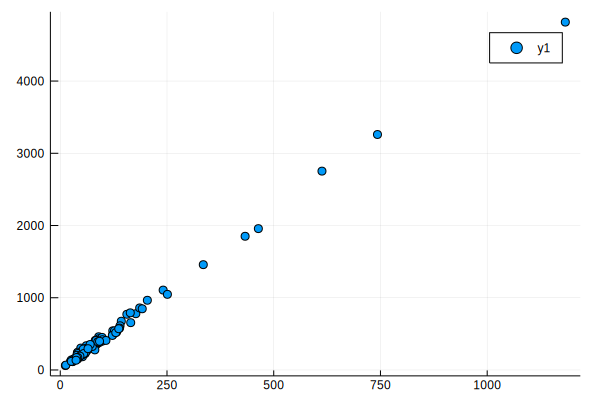

In [118]:
using Gadfly
describe(data_school)
#Gadfly.plot(data_school, x=:Column2, y=:Column4, label=:School)
Plots.scatter( data_school[4], data_school[8] )

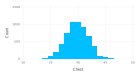

In [123]:
using Gadfly, RDatasets
set_default_plot_size(14cm, 8cm)
Gadfly.plot(dataset("HistData", "ChestSizes"), x="Chest", y="Count", Geom.bar)

In [125]:
# D6111 Longueur du réseau routier (en km) 1954 - 2018
# Administration des Ponts et Chaussées
using CSV
data_infrastructure = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/d6111.csv", datarow = 2, delim = ',')

,Annee,VoiriedelEtat,RoutesNationales,Autoroutes,CheminsRepris
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰
1,1954,2129,702,missing,1393.0
2,1962,2824,865,missing,1959.0
3,1970,2831,865,7,1959.0
4,1975,2849,867,23,1959.0
5,1980,2871,868,44,1959.0
6,1985,2885,868,58,1959.0
7,1986,2892,872,58,1962.0
8,1987,2904,884,58,1962.0
9,1988,2757,865,64,1828.0


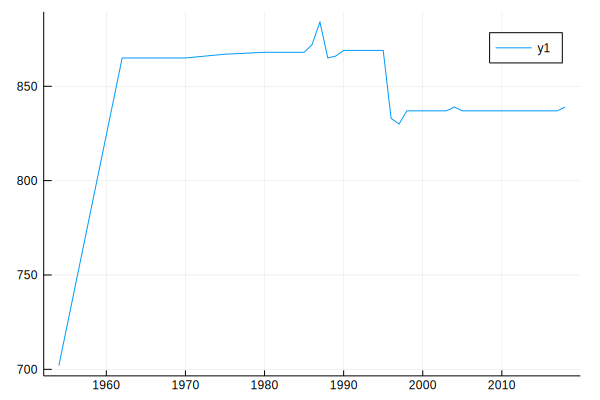

In [133]:
Plots.plot( data_infrastructure[1], data_infrastructure[3] )

In [5]:
# S&P data
using CSV
data_sp500 = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/sp500.csv", datarow = 2, delim = ',')

,Open,High,Low,Close,Volume
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,2575.99,2578.29,2572.15,2575.26,2301425000
2,2583.21,2588.4,2574.92,2579.36,2210945000
3,2579.46,2581.11,2566.17,2579.85,2416738000
4,2581.93,2588.42,2576.77,2587.84,2052553000
5,2587.47,2593.38,2585.66,2591.13,2116417000
6,2592.11,2597.02,2584.35,2590.64,2089737000
7,2588.71,2595.47,2585.02,2594.38,2092333000
8,2584.0,2586.5,2566.33,2584.62,2233489000
9,2580.18,2583.81,2575.57,2582.3,2045162000


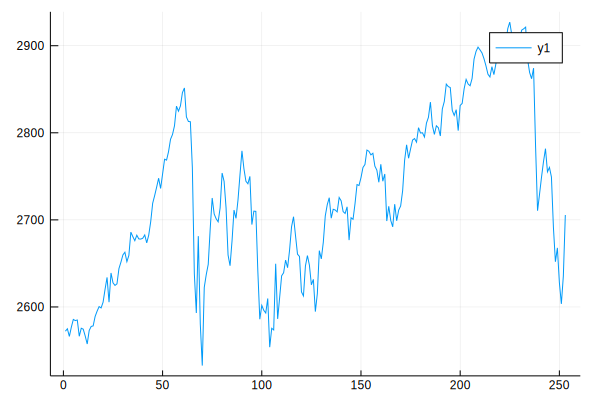

In [8]:
# S&P : october 2017 - october 2018
using Plots
Plots.plot(data_sp500[3])

In [3]:
# D7500 Taux de l'intérêt légal (en %) 1974 - 2018
# Ministère de la Justice
# http://mj.public.lu/services_citoyens/Taux_interet_legal/
# http://legilux.public.lu/eli/etat/leg/rgd/2017/12/12/a1043/jo
using CSV
data_txinteretlegal = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/d7500.csv", datarow = 3, delim = ',')

,Specification,Taux applicable
,Int64⍰,Float64⍰
1,1974,6.0
2,1975,6.0
3,1976,6.0
4,1977,6.0
5,1978,6.0
6,1979,6.0
7,1980,6.0
8,1981,6.0
9,1982,6.0


In [4]:
using Dates
dr_txinteretlegal = Dates.Date(1974):Dates.Year(1):Dates.Date(2018)

1974-01-01:1 year:2018-01-01

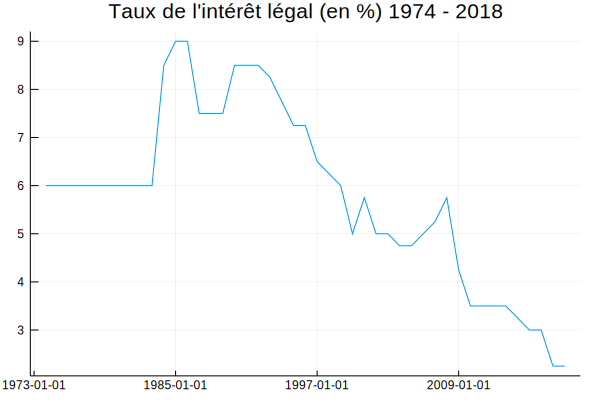

In [5]:
using Plots
Plots.plot(dr_txinteretlegal, data_txinteretlegal[2], title = "Taux de l'intérêt légal (en %) 1974 - 2018", label = "")

In [6]:
# D7200 Évolution des lignes de cotation 1970 - 2017
# Bourse de Luxembourg
using CSV
data_bourseluxembourg = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/d7200.csv", datarow = 3, delim = ',')

,Specification,Lignes de cotation,Emprunts obligataires,+AKAAoACg-Emprunts internationaux,Actions,Organismes de placement collectif,Warrants et autres
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64⍰
1,1980,1557,1379,1312,103,75,0.0
2,1985,3635,3098,3001,187,178,172.0
3,1990,10131,7424,7320,260,1369,1078.0
4,1995,11874,7687,7468,327,2519,1341.0
5,1996,12870,8441,8029,313,2766,1350.0
6,1997,14478,9574,9040,317,3030,1557.0
7,1998,15386,10513,9964,308,3337,1228.0
8,1999,17051,12021,11453,312,3658,1060.0
9,2000,19690,13679,12991,297,4625,1089.0


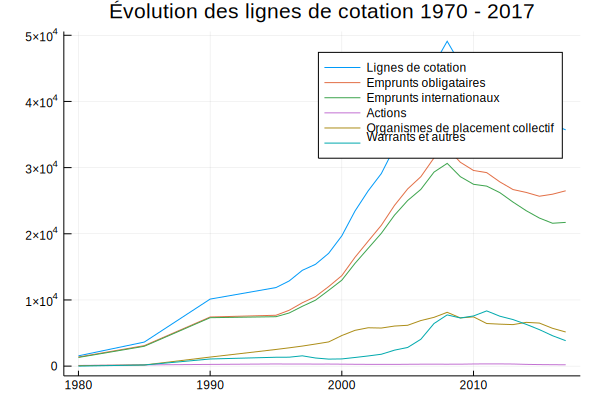

In [8]:
using Plots
Plots.plot(data_bourseluxembourg[1], [data_bourseluxembourg[2] data_bourseluxembourg[3] data_bourseluxembourg[4] data_bourseluxembourg[5] data_bourseluxembourg[6] data_bourseluxembourg[7]], title = "Évolution des lignes de cotation 1970 - 2017", label = ["Lignes de cotation" "Emprunts obligataires" "Emprunts internationaux" "Actions" "Organismes de placement collectif" "Warrants et autres
"])